## **Explanatory Analysis of Factors Affecting Loan Outcomes**
#### By Hayden Allison | 10/15/2023
#### Highlights: Multivariate Charts & Feature Engineering & Machine Learning Model Imputes
#### Report Type: Retrospective Observational Study
#### Programming Method: Python Object-Oriented
#### Population: Prosper Loan Batch (113,066 records)

<img src="C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

*Gold filigrees act as section headers for fancy, yet simple navigation.*

## *Consumer-focused* Research Questions:
* Does income bracket placement affect loan condition qualities?
* Do certain occupations favor loans more than others? How are monthly terms valued & distributed?
* What variables constitute a higher Prosper Score?
## Measures Analyzed of Population
1. Minimum & Maximum: Inspected to determine why minimums/maximums of response variables are populated. Crucial for detecting variance within tables & charts.
2. Mean: Provides evidence for trends. These trends are utilized for substantiating claims derived from included datasets. Allows concise charts to be created, as it eliminates the need for every value to be plotted of a category/series.
3. Median: Middle value for center highlights.
4. Mode: Densest value for center highlights.
5. Sum: Provides evidence for response variable totals. In the absence of summing those attributes, approximations would have to be relayed instead of exact data. 
6. Distributions: Density speaks volumns about patterns within a subset of data.
7. Quartiles: Quarter 1 & Quarter 3 are encoded to be discussed for an accurate analysis of distributions.
8. Standard Deviation: To dive deeper into understanding distributions.
9. Confidence Interval: Accuracy measurements.

## Loan Outcomes Analysis
Recommendations for improving Prosper's profit stream, and understanding mechanisms behind loan conditions to improve customer satisfaction.

<img src="C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

### Tables setup for beautifully crafted charts

In [1]:
# Module & table imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.font_manager import FontProperties

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

customer_df = pd.read_csv(r"C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\customer_table.csv")
credit_df = pd.read_csv(r"C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\credit_table.csv")
loan_df = pd.read_csv(r"C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\loan_table.csv")

# Question #1 table optimized
# Table initialize
loan_chart_df = loan_df[['Term', 'LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate']].copy()
loan_chart_df = loan_chart_df.rename(columns={'LoanOriginalAmount':'Loan Amount', 'BorrowerAPR':'APR', 'BorrowerRate':'Rate'})
loan_chart_df['Income'] = customer_df['IncomeRange'].copy()
loan_charts = pd.DataFrame(loan_chart_df)

# Improving format and structure
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
incomes = pd.CategoricalDtype(categories=income_order, ordered=True)
loan_charts['Income'] = customer_df['IncomeRange'].astype(incomes).copy()
term_order = [12, 36, 60]
terms = pd.CategoricalDtype(categories=term_order, ordered=True)
loan_charts['Term'] = loan_charts['Term'].astype(terms)

# Question #2 table optimized
# Table initialize
occ_charts = loan_df[['Term', 'LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate']].copy()
occ_charts = occ_charts.rename(columns={'LoanOriginalAmount':'Loan Amount', 'BorrowerAPR':'APR', 'BorrowerRate':'Rate'})
occ_charts['Occupation'] = customer_df['Occupation'].copy()

# Question #3 table optimized
# Table initialize
score_charts = customer_df[['ProsperScore', 'IncomeVerifiable', 'TotalTrades']].copy()
score_charts[['OpenCreditLines', 'CurrentDelinquents', 'AmountDelinquent', 'CreditScoreLower',
              'CreditScoreUpper']] = credit_df[['OpenCreditLines', 'CurrentDelinquencies', 'AmountDelinquent',
                                       'CreditScoreRangeLower', 'CreditScoreRangeUpper']].copy()

# Rounding feature values to whole numbers due to decimal insignificance and for discreet formatting
def column_rounder(col):
    score_charts[col] = score_charts[col].round(0)
    return score_charts

for col in score_charts.columns:
    score_charts = column_rounder(col)

In [2]:
loan_charts.head(2)

,Term,Loan Amount,APR,Rate,Income
0,36,9425,0.16516,0.158,"$25,000-49,999"
1,36,10000,0.12016,0.092,"$50,000-74,999"


In [3]:
occ_charts.head(2)

,Term,Loan Amount,APR,Rate,Occupation
0,36,9425,0.16516,0.158,Other
1,36,10000,0.12016,0.092,Professional


In [4]:
score_charts.head(2)

,ProsperScore,IncomeVerifiable,TotalTrades,OpenCreditLines,CurrentDelinquents,AmountDelinquent,CreditScoreLower,CreditScoreUpper
0,6.0,1.0,11.0,4.0,2.0,472.0,640.0,659.0
1,7.0,1.0,29.0,14.0,0.0,0.0,680.0,699.0


#### Container to reduce code clutter in below sections

In [5]:
# Visual settings for all charts
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'font.size': 11, 'axes.titlesize': 14,
                'axes.titlepad': 20}
sns.set(style='whitegrid', palette='rocket_r', font='sans-serif', rc=custom_params)

# Population distribution of APR bins
APR_bins = np.arange(.007, .512+.01, .01)
Rate_bins = np.arange(0, .497+.01, .01)

# Ordinal & income grouping lists
inc_order = ['$0-24,999', '$25,000-74,999', '$75,000+']
category_mapping_income = {
    '$0-24,999': ['$0', '$1-24,999'],
    '$25,000-74,999': ['$25,000-49,999', '$50,000-74,999'],
    '$75,000+': ['$75,000-99,999', '$100,000+']
}

marker_styles = {
    '$0-24,999': 'o',
    '$25,000-74,999': '^',
    '$75,000+': 'D'
}

# Income grouping into 3 brackets instead of 6 for scatterplots
loan_charts2 = loan_charts.copy()
loan_charts2['Income'] = loan_charts2['Income'].map({income: category for category, incomes in category_mapping_income.items() for income in incomes})
ordinals_IR = pd.CategoricalDtype(categories=inc_order, ordered=True)
loan_charts2['Income'] = loan_charts2['Income'].astype(ordinals_IR)

# Mapping occupation categories into groups with similar professions
category_mapping = {
    'Management & Leadership': ['Executive', 'Retail Management', 'Food Service Management', 'Police Officer/Correction Officer', 
                                  'Military Officer', 'Principal', 'Judge'],
    'Skilled Trades': ['Skilled Labor', 'Construction', 'Tradesman - Mechanic', 'Tradesman - Electrician', 'Tradesman - Carpenter', 'Tradesman - Plumber'],
    'Sales & Marketing': ['Sales - Retail', 'Sales - Commission', 'Realtor', 'Car Dealer'],
    'Hospitality & Service': ['Food Service', 'Waiter/Waitress', 'Flight Attendant', 'Bus Driver', 'Religious'],
    'Healthcare & Nursing': ['Nurse (RN)', 'Nurse (LPN)', 'Nurse\'s Aide', 'Pharmacist', 'Doctor', 'Dentist'],
    'Education': ['Teacher', 'Professor', 'Teacher\'s Aide', 'Student - College Senior', 'Student - College Graduate Student', 'Student - College Sophomore', 
                  'Student - College Junior', 'Student - College Freshman', 'Student - Community College', 'Student - Technical School'],
    'Legal & Financial': ['Accountant/CPA', 'Attorney'],
    'Engineering & Tech': ['Computer Programmer', 'Engineer - Mechanical', 'Engineer - Electrical', 'Engineer - Chemical'],
    'Science': ['Scientist', 'Biologist', 'Chemist'],
    'Public Service': ['Fireman', 'Civil Service', 'Postal Service', 'Social Worker', 'Military'],
    'Office Workers': ['Clerical', 'Clergy', 'Analyst', 'Investor', 'Psychologist'],
    'Creative & Arts': ['Architect', 'Landscaping', 'Homemaker'],
    'Transportation & Logistics': ['Truck Driver', 'Pilot - Private/Commercial'],
    'Other': ['Other'],
    'Professional': ['Professional']
}
occ_charts['Occupation'] = occ_charts['Occupation'].map({occupation: category for category, occupations in category_mapping.items() for occupation in occupations})

# Formatting term into an appropriate ordinal feature
term_order2 = [12, 36, 60]
terms2 = pd.CategoricalDtype(categories=term_order, ordered=True)
occ_charts['Term'] = loan_charts['Term'].astype(terms)

# Doughnut chart code
pie_labels = ['36', '60', '12']
pie_sizes = [87224, 24228, 1614]
pie_explode = (0.2, 0, 0)
pie_bold_font = FontProperties(weight='bold', size=16)

# Fixing encoded IncomeVerifiable values
score_charts.loc[score_charts['IncomeVerifiable'] == 1, 'IncomeVerifiable'] = "Yes"
score_charts.loc[score_charts['IncomeVerifiable'] == 0, 'IncomeVerifiable' ] = "No"

## Research Question #1
#### *Does income bracket placement affect loan condition qualities?*

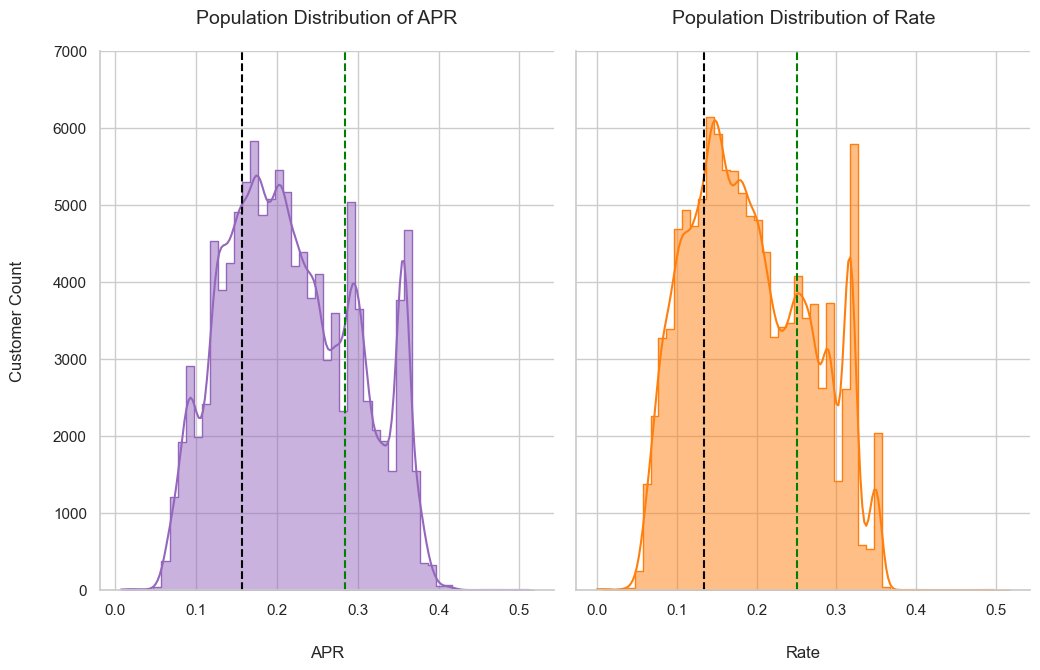

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

# Left chart - APR
sns.histplot(data=loan_charts, x='APR', color='tab:purple', element='step', kde=True, bins=APR_bins, ax=ax1)
ax1.set_title('Population Distribution of APR')
ax1.set_xlabel('APR' , labelpad=20)
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_yticks(range(0, 7001, 1000))
ax1.set_ylabel('Customer Count', labelpad=20)

# Right chart - Rate
sns.histplot(data=loan_charts, x='Rate', color='tab:orange', element='step', kde=True, bins=APR_bins, ax=ax2)
ax2.set_title('Population Distribution of Rate')
ax2.set_xlabel('Rate', labelpad=20)
ax2.set(yticklabels=[])
ax2.set_ylabel('')
ax2.set_xticklabels(ax1.get_xticklabels())
ax2.set_yticks(range(0, 7001, 1000))
q1rtR = np.quantile(loan_charts.Rate, .25)
ax2.axvline(x=q1rtR, label='Q1', c='black', linestyle='dashed')
q1rtR3 = np.quantile(loan_charts.Rate, .75)
ax2.axvline(x=q1rtR3, label='Q3', c='green', linestyle='dashed')

# Quartile lines
q1rt = np.quantile(loan_charts.APR, .25)
ax1.axvline(x=q1rt, label='Q1', c='black', linestyle='dashed')
q1rt3 = np.quantile(loan_charts.APR, .75)
ax1.axvline(x=q1rt3, label='Q3', c='green', linestyle='dashed')

plt.subplots_adjust(wspace=.05) 
plt.show()

#### Black dotted lines: 25% quartile | Green dotted lines: 75% quartile
#### APR Analysis - *left*
Customers should expect to receive an APR .15 - .35. Most common APRs are .15-.2 & .29 & 3.6. APR of .15 is a little before the black dotted line. Prosper can gauge expected profits assuming the average loan borrower will receive one of these APRs, or clsoe to. Any further outside these ranges, the more unlikely it becomes for that APR to be provided. This is evident by overall distribution decline after the green line.
#### Rate Analysis - *right*
Customer should expect to receive a rate .1 - .325. Most common rates are .14 & .325. Prosper can gauge expected profits assuming the average loan borrower will receive one of these rates, or close to. Any further outside these ranges, the more unlikely it becomes for that rate to be provided. This is evident by the overall distribtuion decline starting at the .2 rate tick.

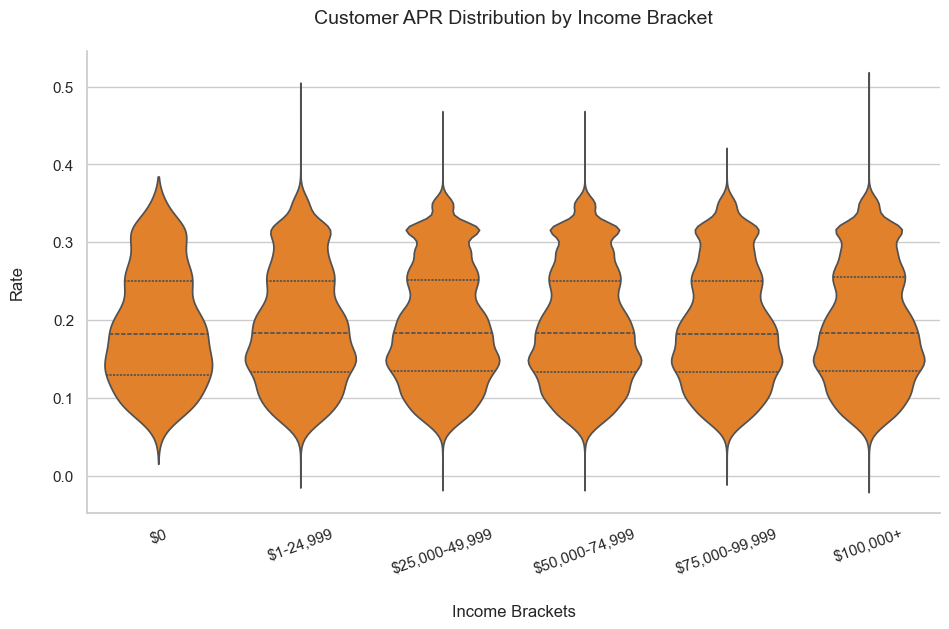

In [7]:
plt.figure(figsize=(11,6))
sns.violinplot(data=loan_charts, x='Income', y='Rate', inner='quartiles', color='tab:orange')
plt.xticks(rotation=20)
plt.title('Customer APR Distribution by Income Bracket')
plt.xlabel('Income Brackets', labelpad=20)
plt.ylabel('Rate', labelpad=20)
plt.show()

#### Rate by Income Bracket Analysis
##### *The APR version of this scatterplot is a replica. Conclusions contrived here are applicable to APR.*
Individuals in the 100,000 & 1-24,999 should be open to a higher APR due to their improved financial status. The outliers for 100,000+ & 1-24,999 are above smaller categories. 25,000-49,999 substantiates that other factors are at play when determining rate. 1-24,999 has less customers receiving the same rate, with 0 amplifying this effect; given their rounded left & right edges. Prosper can evaluate giving higher rates to the 75,000+ income brackets since these individuals can readily afford the expense. It's honestly leaving money on the table.

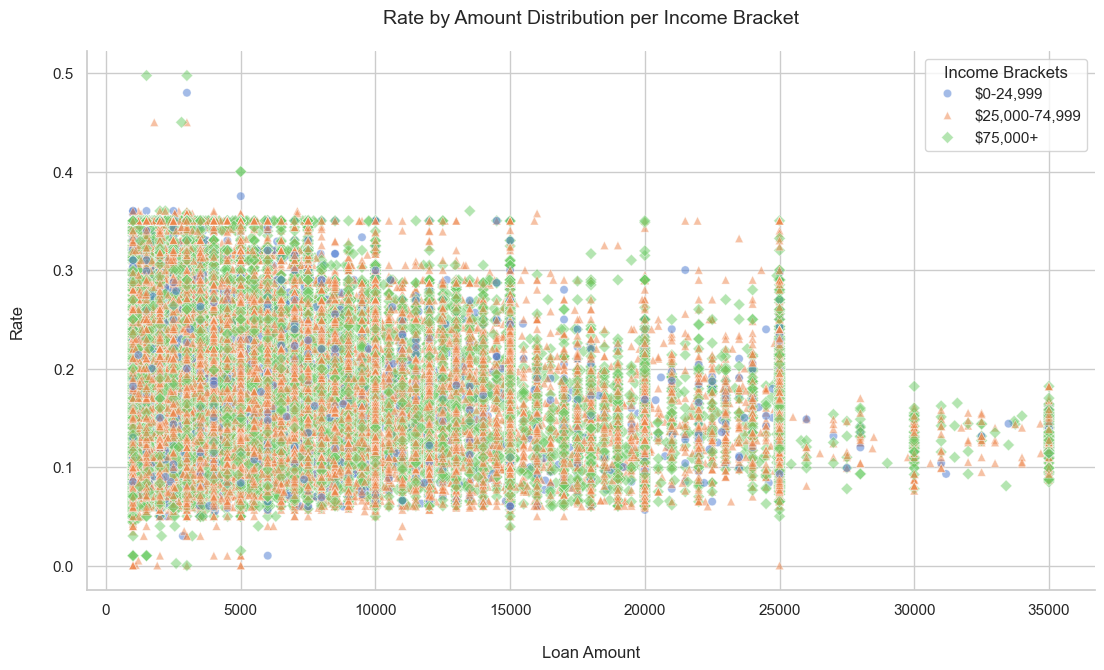

In [8]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=loan_charts2, x='Loan Amount', y='Rate', hue='Income', style='Income', alpha=0.5, markers=marker_styles,
               palette='muted')
plt.title('Rate by Amount Distribution per Income Bracket')
plt.xlabel('Loan Amount', labelpad=20)
plt.ylabel('Rate', labelpad=20)
plt.legend(title='Income Brackets')
plt.show()

#### Rate by Loan Amount per Income Bracket Analysis
##### *The APR version of this scatterplot is a replica. Conclusions contrived here are applicable to APR.*
Chart readibility was at an all time low with 5 income brackets. Looked like a glob of rainbow goo. To rectify, income brackets were grouped into pairs of 3 instead of individual 6. This chart provides evidence for minimum & maximum loan amounts being accessible to any income bracket. On the contrary, distribution is mixed. 25,000-75000+ tiers are readily given loans of 25000+ USD, where the lowest tier lacks such accessibility. It also appears rate is not affixed to income bracket, given the wide and uniform distribution of each income bracket. Prosper needs to limit access of higher loans amounts (25,000+ USD) to 0-24,999. There shouldn't be any customer of that stature acquitted with a loan they don't have the means to pay back, in other words the blue circle marker should be visible at a maximum of 20,000 USD. The poverty line within United States is at 15,000 USD for individuals; which is the justification used for this propisition. Additionally, rates have uniform distribution between Income brackets. Prosper is accommadting their higher loan borrowers properly with lower rates.
## Research Question #2
#### *Do certain occupations favor loans moreso than others? How are monthly terms valued & distributed?*

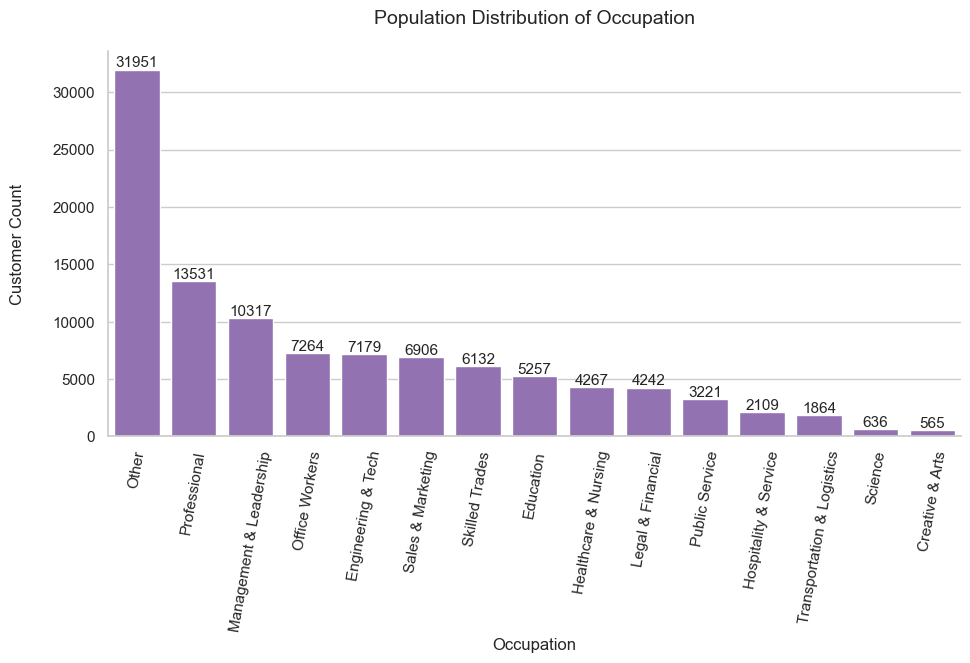

In [9]:
popXocc = occ_charts.Occupation.value_counts().index
plt.figure(figsize=(11,5))
sns.countplot(data=occ_charts, x='Occupation', color='tab:purple', order=popXocc)
plt.xticks(rotation=80)
plt.title('Population Distribution of Occupation')
plt.ylabel('Customer Count', labelpad=20)

# Printing values on bars
clarity_counts = occ_charts['Occupation'].value_counts()
for i in range(clarity_counts.shape[0]):
    total = clarity_counts[i]
    plt.text(i, total+1200, total, va='top', ha='center')

#### Occupation Populace Analysis
Other is by far the mode, but this is presumably due to it's vast reach across the job sphere. Sadly the information behind what makes up Other is vacant. Creative & Arts and Science are barely noticable in the back. Prosper could consider making marketing attempts to these groups for easy growth unless there's an absence of workers available. An alternative and proven effective approach is targeting Professional to Legal & Financial categories, not including Skilled Trades *(contains professions where workers are dispersed or constantly changing locations)*. Word spreads easily since employees are in close proximity, in other words free advertising.

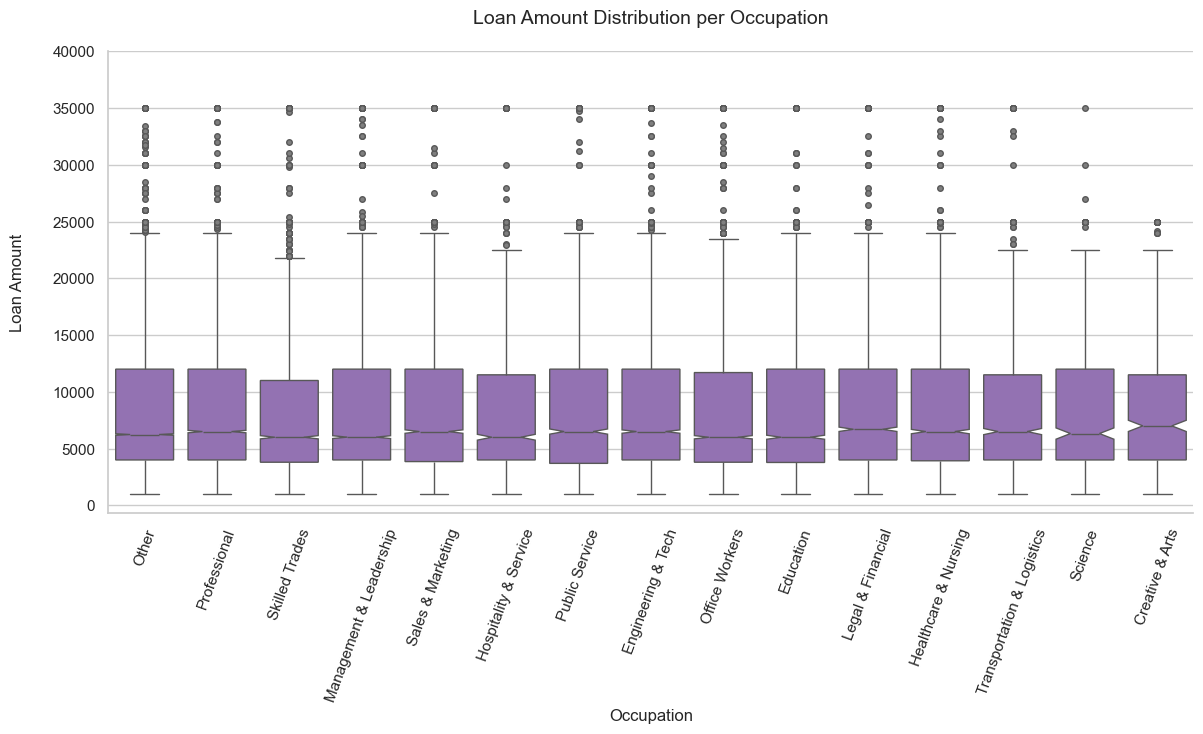

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(data=occ_charts, x='Occupation', y='Loan Amount', color='tab:purple', flierprops={'markerfacecolor': 'tab:gray', 
            'markersize': 4}, notch=True)
plt.xticks(rotation=70)
plt.yticks(range(0, 40001, 5000))
plt.ylabel('Loan Amount', labelpad=20)
plt.title('Loan Amount Distribution per Occupation')
plt.show()

#### Loan Amount by Occupation Analysis
Due to their limited population or restricted financing, Creative & Arts has the strictest range for loan amounts available. The opposite is reflected in other occupations. They along with Science have the lowest confident interval score for the depicted median, which defines the median as most susceptible to being wrong within this chart. Medians and distribution boxes vary slightly. Skilled Trades, Hospitality & Service, Office Workers, Transportation & Logistics, also Creative & Arts shower a short distribution; providing evidence for the fact that these occupations borrow smaller loans. Besides Creative & Arts, they do have smaller value medians but Creative & Arts does have a possibility to be that low due to its confidence interval. This further proves that propisition. Prosper should target the occupations who borrower financially bigger loans in order to maximize profits. Marketing to Creative & Arts will yield less revenue compared to Professional for example.

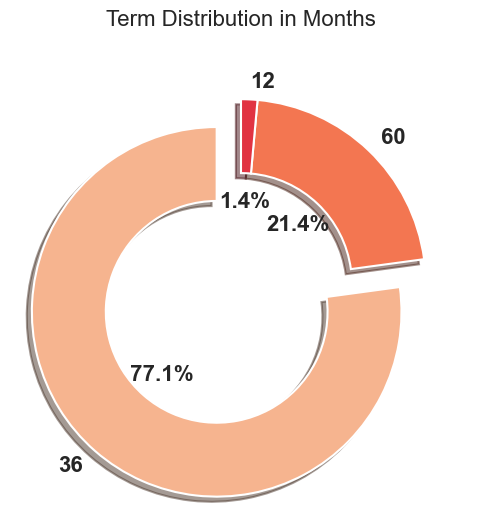

In [11]:
plt.figure(figsize=(10,6))
plt.pie(pie_sizes, explode=pie_explode, labels=pie_labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       wedgeprops={'width':.4, 'linewidth':1.5}, textprops={'fontproperties': pie_bold_font},
                   pctdistance=.45)
plt.title('Term Distribution in Months', size=16)
plt.show()

#### Terms Population Analysis
Individuals accepting Loans through Prosper first prefer 36 terms then 60. Hardly any go for the 12 term loan. It's wise to focus on promoting the terms customers are interested in and support these promotions with deals, enticing conditions, etc. Increasing 12 month loan terms to 18 or 24 should be explored to increase their popularity which can inturn supply new customers.

## Research Question #3
#### *What variables constitute a higher Prosper Score?*

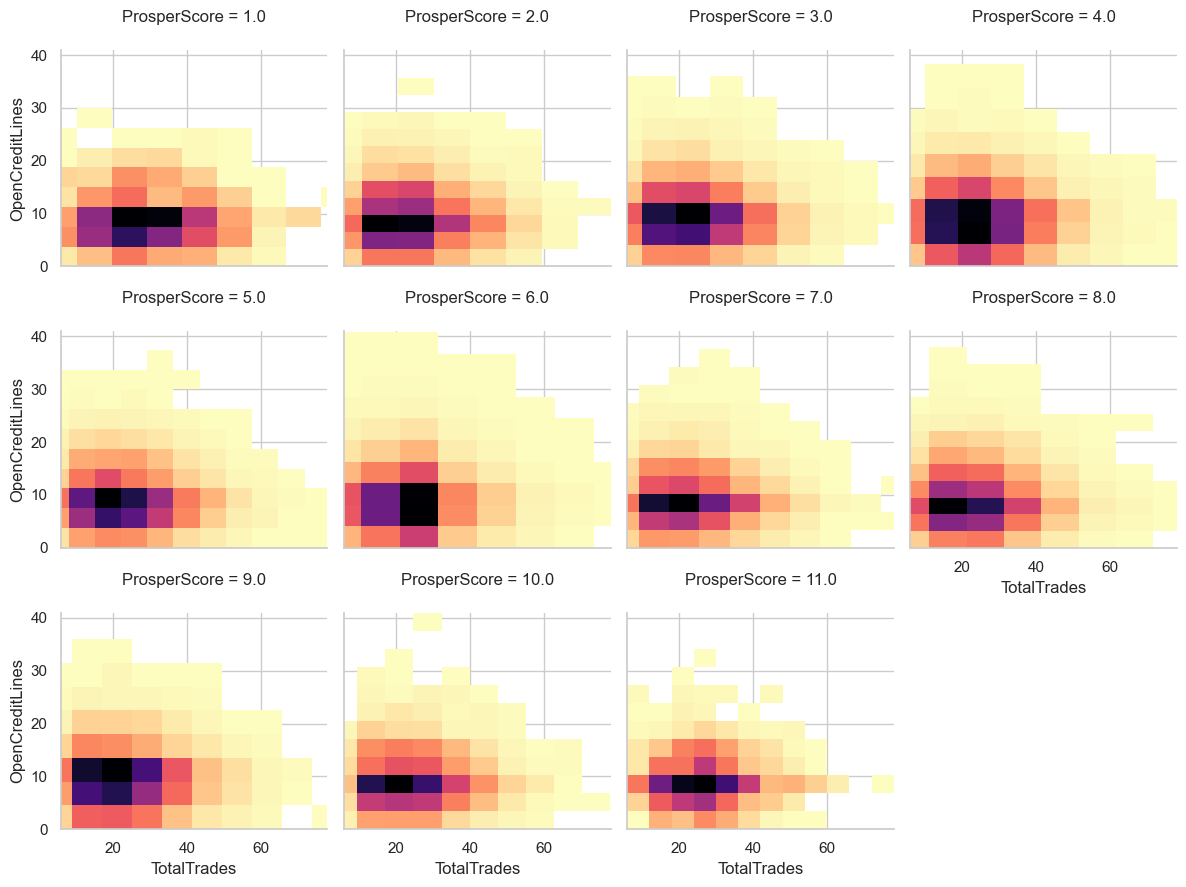

In [12]:
FG = sns.FacetGrid(data=score_charts, col='ProsperScore', col_wrap=4, height=3)
FG.map(plt.hist2d, 'TotalTrades', 'OpenCreditLines', cmap='magma_r', cmin=2, bins=12)
for ax in FG.axes.flat:
    for c in ax.collections:
        c.set_edgecolor("none")

#### Total Trades by Open Credit Lines per ProsperScore Analysis
Mode within all charts includes 20 Trades x 10 Credit lines. ProsperScores: 1, 2, 4, 6, 9, 11 are bimodial. Distribution for each ProsperScore, besides 6, has a radius of 2 cells where values gradually fade into lower amounts then dispersing into a large radius low yellow values. Customers who stick within the darker color radius will yield better loan conditions. Opening too many credit lines or trades is going against the status quo and could harm financial standing, according to Prosper and other loan providers. ProsperScore 4 & 6 have the least variance in values, contrasted by scores 10 & 11.

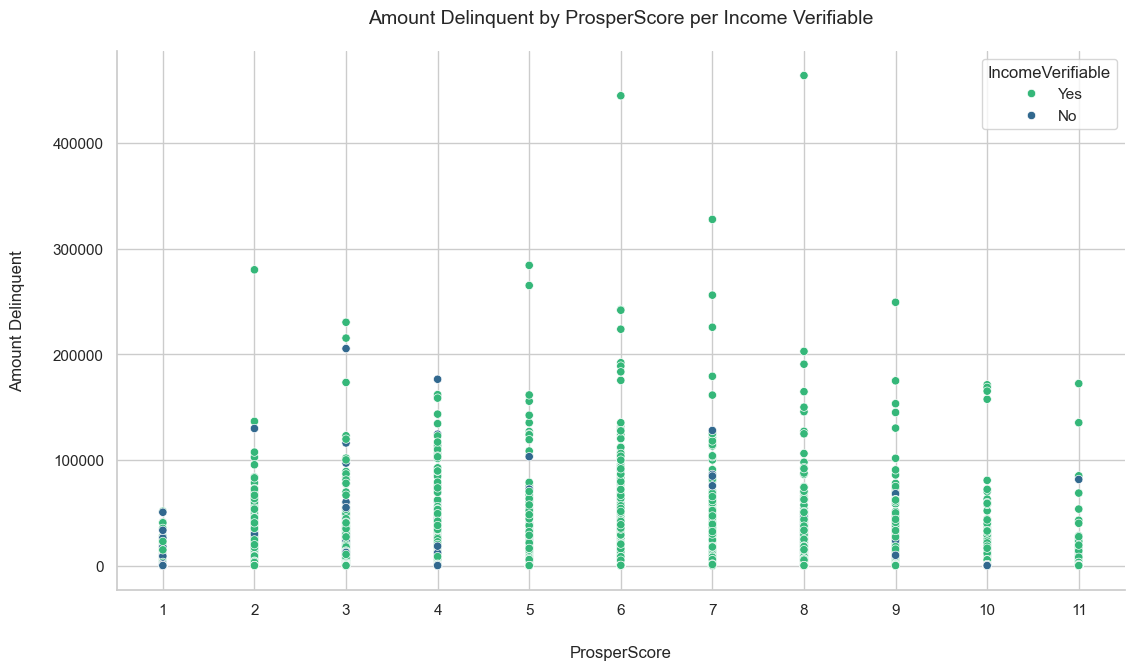

In [13]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=score_charts, x='ProsperScore', y='AmountDelinquent', palette='viridis_r', hue='IncomeVerifiable')
plt.xticks([i for i in range(1,12)])
plt.title('Amount Delinquent by ProsperScore per Income Verifiable')
plt.ylabel('Amount Delinquent', labelpad=20)
plt.xlabel('ProsperScore', labelpad=20)
plt.show()

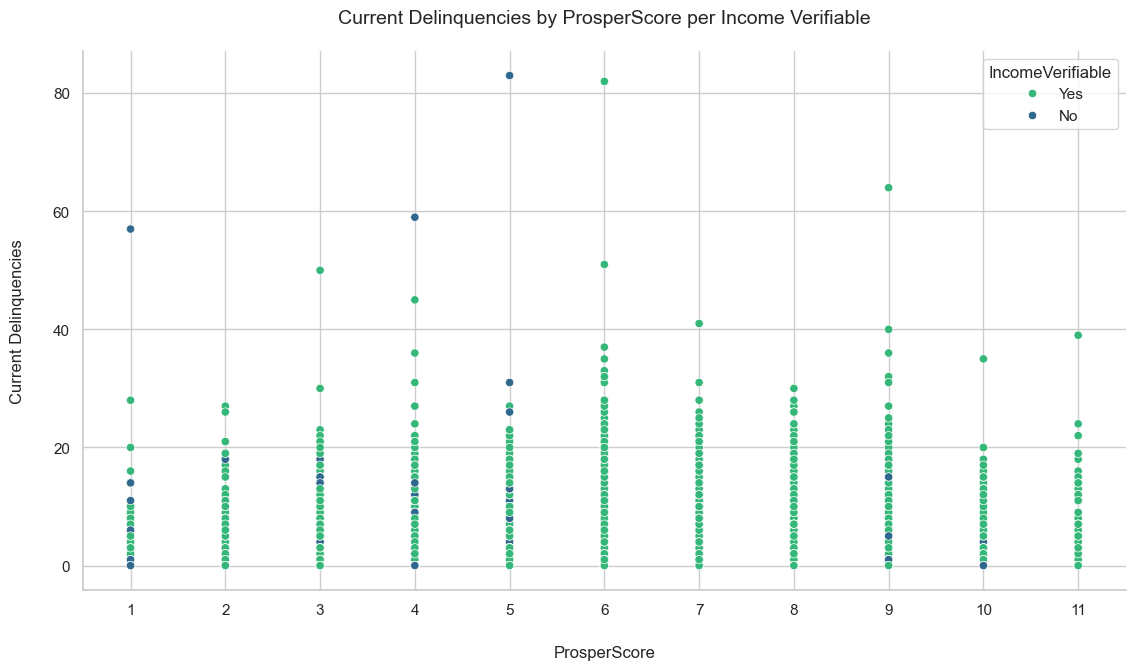

In [14]:
plt.figure(figsize=(13.45,7))
sns.scatterplot(data=score_charts, x='ProsperScore', y='CurrentDelinquents', palette='viridis_r', hue='IncomeVerifiable')
plt.xticks([i for i in range(1,12)])
plt.title('Current Delinquencies by ProsperScore per Income Verifiable')
plt.ylabel('Current Delinquencies', labelpad=20)
plt.xlabel('ProsperScore', labelpad=20)
plt.show()

#### ProsperScore by CurrentDelinquents & AmountDelinquent per IncomeVerifiable Analysis
"No" IncomeVerifiable values are prominently less common in categories 6+ in the bottom chart, and evenly dispersed in the top chart. ProsperScores 6, 7, 8, 10, 11 have scarce amounts or none of this value. Bottom chart outliers are equally dispersed between IncomeVerifiable, with the top chart dominated by "Yes" for this metric. Its possible Prosper does consider current delinquencies as more problematic than delinquent amount balance. Advice for customers is to keep their current delinquencies in check. Having customers saddled with debt such as 40+ current delinquences or 200,000 balance owed is a financial gamble. The safe play is to deny loan borrowers of this stature any new loans.

## Conclusion
In this analysis, several aspects of Prosper's loan data was explored and conclusions drawn about its lending practices. Below are recommendations for both Prosper and its customers to achieve improved results & satisfaction.

<img src="C:\Users\tekre\Downloads\Analysis Projects\10022023_Loans_Analysis\10152023_Loan_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

### Analysis Key Insights
#### APR & Rate Analysis:
Prosper borrowers can expect APRs in the range of 0.15 to 0.35, with the most common rates falling within the 0.15-0.2 and 0.29-0.36 range. For interest rates, customers should anticipate rates between 0.1 and 0.325, with 0.14 and 0.325 being the most common. Prosper can gauge expected profits based on these ranges. Deviating significantly from these ranges is less likely.

#### Rate by Income Bracket Analysis:
Individuals with incomes of 100,000 and those earning between 1-24,999 might receive higher APRs due to their improved financial status. Prosper should consider offering higher rates to individuals in the 75,000+ income brackets as they can likely afford the expense, potentially increasing profits.

#### Rate by Loan Amount per Income Bracket Analysis:
The distribution of loan amounts and rates is mixed across income brackets. Prosper needs to limit access to higher loan amounts, especially for customers in the $0-24,999 income bracket, to ensure they can comfortably repay the loans.

#### Occupation Populace Analysis:
"Other" is the most common occupation category, but there's a lack of specific information about it. Prosper could consider targeting occupations like Creative & Arts and Science for potential growth opportunities.

#### Loan Amount by Occupation Analysis:
Creative & Arts has the strictest range for loan amounts, while other occupations tend to have more flexibility. Prosper should focus its marketing efforts on occupations that borrow larger loans, such as Professional occupations.

#### Terms Population Analysis:
Customers typically prefer 36-month and 60-month loan terms, with few choosing 12-month terms. Prosper should focus on promoting the terms customers prefer and consider exploring 18 or 24-month terms to increase their popularity.

#### Total Trades by Open Credit Lines per ProsperScore Analysis:
ProsperScores 1, 2, 4, 6, 9, and 11 exhibit bimodal distributions. Staying within the darker color radius for the total number of trades and credit lines can lead to better loan conditions. Opening too many credit lines or trades may harm financial standing.

#### ProsperScore by Current Delinquents & Amount Delinquent per Income Verifiable Analysis:
Customers with fewer current delinquencies and manageable delinquent balances tend to receive better loan conditions. Customers should aim to keep their current delinquencies in check, as high numbers of delinquencies or large balances owed can make obtaining new loans a financial gamble.

### Recommendations for Prosper & Customers:
* Prosper should consider tailoring APRs and rates to income brackets more effectively.
* Limit access to higher loan amounts for lower income brackets to mitigate risk.
* Explore marketing to specific occupations that are likely to borrow larger loans.
* Focus on promoting loan terms that are popular among customers.
* Encourage customers to maintain a clean record in terms of current delinquencies for better loan conditions.